### Object Detection Using OpenCV Yolo
#### References
##### https://www.arunponnusamy.com/yolo-object-detection-opencv-python.html
##### https://pjreddie.com/darknet/yolo/

In [ ]:
import cv2
import numpy as np

# 'path to input image/video'
IMAGE='./1.mp4'

# 'path to yolo config file' 
# download https://github.com/arunponnusamy/object-detection-opencv/blob/master/yolov3.cfg
CONFIG='./yolov3.cfg'

# 'path to text file containing class names'
# download https://github.com/arunponnusamy/object-detection-opencv/blob/master/yolov3.txt
CLASSES='./yolov3.txt'

# 'path to yolo pre-trained weights' 
# wget https://pjreddie.com/media/files/yolov3.weights
WEIGHTS='./yolov3.weights' 


In [ ]:
import os  
print(os.path.exists(CLASSES))
print(os.path.exists(CONFIG))
print(os.path.exists(WEIGHTS))
print(os.path.exists(IMAGE))

In [ ]:
# read class names from text file
classes = None
with open(CLASSES, 'r') as f:
     classes = [line.strip() for line in f.readlines()]
        
scale = 0.00392
conf_threshold = 0.5
nms_threshold = 0.4

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net): 
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [ ]:
def processImage(image,index):

    Width = image.shape[1]
    Height = image.shape[0]

    # read pre-trained model and config file
    net = cv2.dnn.readNet(WEIGHTS, CONFIG)

    # create input blob 
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
    # set input blob for the network
    net.setInput(blob)

    # run inference through the network
    # and gather predictions from output layers
    outs = net.forward(get_output_layers(net))

    # initialization
    class_ids = []
    confidences = []
    boxes = []
    # for each detetion from each output layer 
    # get the confidence, class id, bounding box params
    # and ignore weak detections (confidence < 0.5)
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])
            
    # apply non-max suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # go through the detections remaining
    # after nms and draw bounding box
    for i in indices:
        i = i[0]
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
    
        draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    
    # display output image    
    out_image_name = "object detection"+str(index)
    #cv2.imshow(out_image_name, image)
    # wait until any key is pressed
    #cv2.waitKey()
     # save output image to disk
    cv2.imwrite("out/"+out_image_name+".jpg", image)

In [ ]:
# open the video file
cap = cv2.VideoCapture(IMAGE)

index = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    processImage(frame,index)
    index = index +1
    
# release resources
cv2.destroyAllWindows()

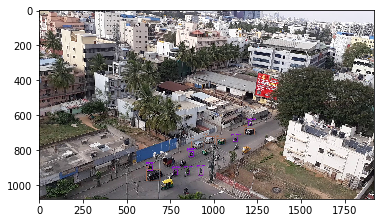

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('out/object detection1.jpg')
plt.imshow(img)

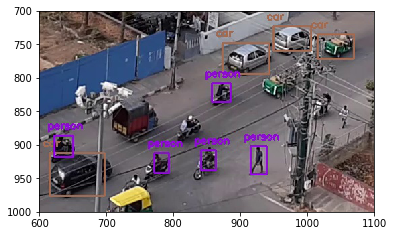

In [7]:
plt.imshow(img)
plt.xlim(600, 1100)
plt.ylim(1000,700)
plt.show()

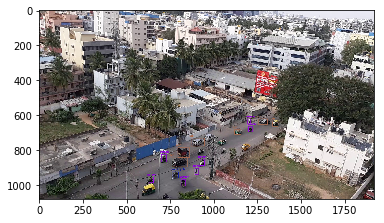

In [10]:
img = mpimg.imread('out/object detection32.jpg')
plt.imshow(img)

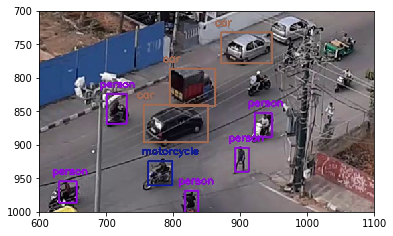

In [11]:
img = mpimg.imread('out/object detection32.jpg')
plt.imshow(img)
plt.xlim(600, 1100)
plt.ylim(1000,700)
plt.show()

#### As you can see person,car, motocycle are identified